<a href="https://colab.research.google.com/github/Subashathithya/BDA-DA2/blob/main/E_Commerce_from_multi_category_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!pip install MiniSom
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=35580027793aed8905eb53060d63dadbbc58412b95c342e79ed6f522d6ce18c8
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"subashathithyam","key":"2c729aa02ca10c611c69ac8c4c27a800"}'}

In [3]:
import os
print(os.listdir())

['.config', 'kaggle.json', 'sample_data']


In [4]:
!mkdir -p ~/.kaggle
!ls -a ~/

.   .bashrc  .config   .jupyter  .keras		.local	.profile    .wget-hsts
..  .cache   .ipython  .kaggle	 .launchpadlib	.npm	.tmux.conf


In [5]:
!cp kaggle.json ~/.kaggle/
!ls -lha ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Sep 29 07:54 .
drwx------ 1 root root 4.0K Sep 29 07:53 ..
-rw-r--r-- 1 root root   71 Sep 29 07:54 kaggle.json


In [6]:
!chmod 600 ~/.kaggle/kaggle.json
!ls -lha ~/.kaggle/

total 16K
drwxr-xr-x 2 root root 4.0K Sep 29 07:54 .
drwx------ 1 root root 4.0K Sep 29 07:53 ..
-rw------- 1 root root   71 Sep 29 07:54 kaggle.json


In [7]:
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57          17838        334  1.0              
abdulszz/spotify-most-streamed-songs                             Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           4746         58  1.0              
waqi786/impact-of-virtual-reality-on-education                   Impact of Virtual Reality on Education 📚🕶️           79KB  2024-09-25 11:54:14            918         24  1.0              
owm4096/laptop-prices                                  

In [2]:
!kaggle datasets download -d mkechinov/ecommerce-behavior-data-from-multi-category-store
!unzip ecommerce-behavior-data-from-multi-category-store.zip

Dataset URL: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
License(s): copyright-authors
ecommerce-behavior-data-from-multi-category-store.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ecommerce-behavior-data-from-multi-category-store.zip
replace 2019-Nov.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('2019-Oct.csv')
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [4]:
data_filtered = data[['user_id', 'event_type', 'product_id', 'category_id']]
data_filtered = data_filtered[data_filtered['event_type'] == 'purchase']
data_filtered = data_filtered.drop_duplicates()
data_filtered.head()

,user_id,event_type,product_id,category_id
162,543272936,purchase,1004856,2053013555631882655
308,551377651,purchase,1002532,2053013555631882655
379,514591159,purchase,5100816,2053013553375346967
442,555332717,purchase,13800054,2053013557418656265
574,524601178,purchase,4804055,2053013554658804075


In [5]:
customer_data = data_filtered.groupby('user_id').agg({
    'product_id': 'nunique',
    'category_id': 'nunique'
}).reset_index()
customer_data.columns = ['user_id', 'unique_products', 'unique_categories']
customer_data.head()

,user_id,unique_products,unique_categories
0,264649825,2,1
1,303160429,1,1
2,340041246,1,1
3,371877401,1,1
4,401646272,1,1


In [6]:
scaler = MinMaxScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['unique_products', 'unique_categories']])
pd.DataFrame(customer_data_scaled, columns=['unique_products', 'unique_categories']).head()

,unique_products,unique_categories
0,0.020833,0.0
1,0.000000,0.0
2,0.000000,0.0
3,0.000000,0.0
4,0.000000,0.0


In [7]:
som = MiniSom(x=10, y=10, input_len=2, sigma=1.0, learning_rate=0.5)
som.random_weights_init(customer_data_scaled)
som.train_random(customer_data_scaled, 100)
print("SOM training completed.")

SOM training completed.


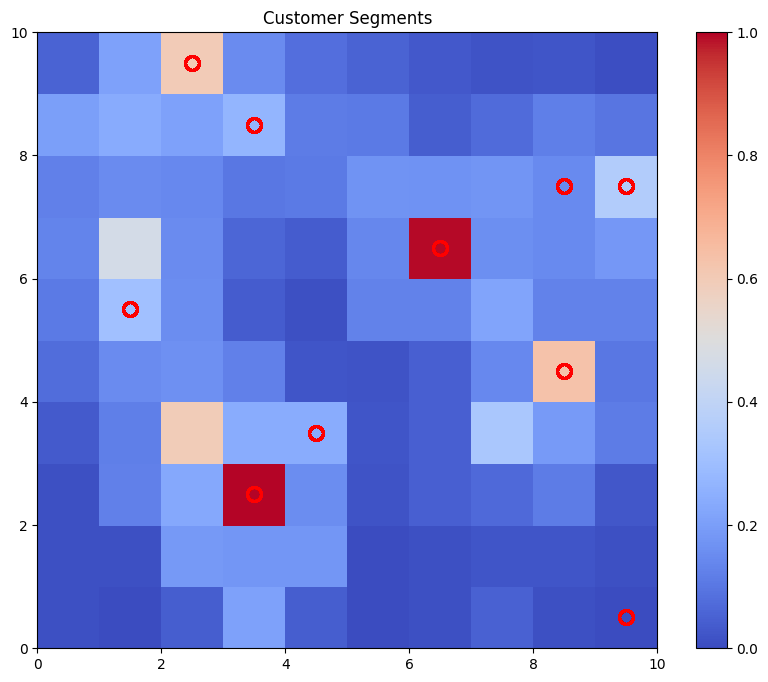

In [8]:
plt.figure(figsize=(10, 8))
plt.bone()
pcolor = plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar(pcolor)
for i, x in enumerate(customer_data_scaled):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None',
             markeredgecolor='r', markersize=10, markeredgewidth=2)
plt.title('Customer Segments')
plt.show()

In [9]:
customer_segments = []
for i, customer in enumerate(customer_data_scaled):
    winning_node = som.winner(customer)
    customer_segments.append(winning_node)
customer_data['segment'] = customer_segments
customer_data.head()

,user_id,unique_products,unique_categories,segment
0,264649825,2,1,"(8, 7)"
1,303160429,1,1,"(9, 0)"
2,340041246,1,1,"(9, 0)"
3,371877401,1,1,"(9, 0)"
4,401646272,1,1,"(9, 0)"


In [10]:
customer_data.to_csv('segmented_customers.csv', index=False)
print("Customer segmentation saved to 'segmented_customers.csv'.")

Customer segmentation saved to 'segmented_customers.csv'.


In [11]:
customer_data['segment'] = customer_data['segment'].apply(lambda x: str(x))
segment_analysis = customer_data.groupby('segment').agg({
    'unique_products': 'mean',
    'unique_categories': 'mean',
    'user_id': 'count'
}).reset_index()
print(segment_analysis)

  segment  unique_products  unique_categories  user_id
0  (1, 5)         3.904986           1.963629     4894
1  (2, 9)         6.899471           6.000000      378
2  (3, 2)         8.668482           4.251362     1285
3  (3, 8)         2.000000           2.000000    11645
4  (4, 3)         3.488867           1.000000     4042
5  (6, 6)         4.000000           4.000000      413
6  (8, 4)         3.000000           3.000000     1875
7  (8, 7)         2.000000           1.000000    13315
8  (9, 0)         1.000000           1.000000   123534
9  (9, 7)         4.532536           3.000000     1337


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
customer_data['segment_encoded'] = label_encoder.fit_transform(customer_data['segment'])

In [13]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(8, activation='relu'))
model.add(Dense(customer_data['segment_encoded'].nunique(), activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(customer_data_scaled, customer_data['segment_encoded'], epochs=10, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8106 - loss: 0.8482
Epoch 2/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9721 - loss: 0.0972
Epoch 3/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9934 - loss: 0.0331
Epoch 4/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9984 - loss: 0.0131
Epoch 5/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9991 - loss: 0.0067
Epoch 6/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 7/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9994 - loss: 0.0025
Epoch 8/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - loss: 0.0020
Epoch 9/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 10/10
5085/5085 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9996 - loss: 0.0013


In [15]:
new_customers_df = pd.DataFrame(new_customers, columns=['unique_products', 'unique_categories'])
new_customers_scaled = scaler.transform(new_customers_df)
predictions = model.predict(new_customers_scaled)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
['(1, 5)' '(9, 0)']
